In [58]:
import glob
import re
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [59]:
br_states = list(shpreader.Reader('../../mapping/BR_UF.shp').geometries())

In [60]:
pluviometer_dir = '../../pluviometer/pluv_vale_lat_lon.csv'
list_pluviometer = pd.read_csv(pluviometer_dir,sep=';')
len_pluviometer = len(list_pluviometer)
list_pluviometer.head(5)

,Name,Latitude,Longitude
0,RH-92-PLUVIOMETRO-EFVM,-19.649351,-43.159383
1,RH-84-PLUVIOMETRO-EFVM,-19.956498,-43.286721
2,RH-78-PLUVIOMETRO-EFVM,-19.746002,-43.022259
3,RH-72-PLUVIOMETRO-EFVM,-19.648011,-42.860899
4,RH-60-PLUVIOMETRO-EFVM,-19.313211,-42.362461


In [65]:
names_pluv = []
for t in range(len_pluviometer):
    tmp = list_pluviometer['Name'][t].replace('-PLUVIOMETRO-EFVM','')
    names_pluv.append(tmp)

In [61]:
year = '2020'
IMERG_files = glob.glob('/run/media/arturo/Arturo/Data/IMERG/raw_30min/'+year+'/*.nc4')
IMERG_files = sorted(IMERG_files)
len_IMERG = len(IMERG_files)
print(f'Year {year} has {len_IMERG} files in directory')

Year 2020 has 17568 files in directory


../../images/pluviometer_position.png


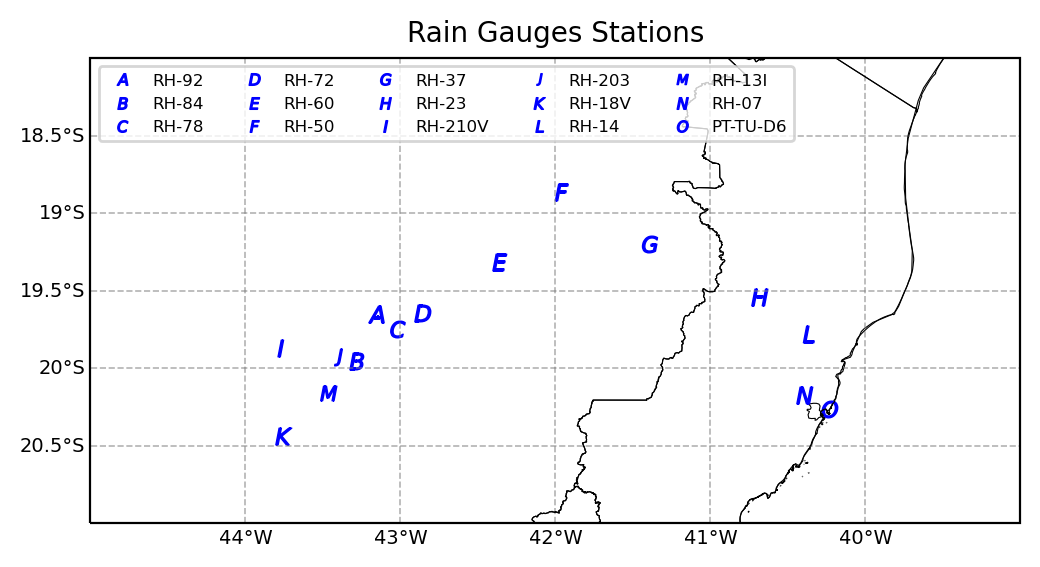

In [184]:
pluviometer_names = list_pluviometer['Name']
x = np.arange(len_pluviometer)
# marker = ['$1$','$2$','$3$','$4$','$5$','$6$','$7$','$8$','$9$','$10$','$11$','$12$','$13$','$14$','$15$','$16$']
marker = ['$A$','$B$','$C$','$D$','$E$','$F$','$G$','$H$','$I$','$J$','$K$','$L$','$M$','$N$','$O$','$P$']

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,6),dpi=200)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linewidth=0.4)
ax1.set_extent([-45,-39,-21,-18])
ax1.add_geometries(br_states,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.4,zorder=5)

gl = ax1.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.left_labels = True
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = True
gl.ylabel_style = {'fontsize': 7}
gl.xlabel_style = {'fontsize': 7}

for t in range(len_pluviometer):
    a1 = ax1.plot(list_pluviometer['Longitude'][t],list_pluviometer['Latitude'][t],marker=marker[t],markeredgewidth=0.5,markersize=6,color='b',label=names_pluv[t],lw=0)

ax1.set_title('Rain Gauges Stations',fontsize=10)

plt.legend(ncol=5,fontsize=6,loc='upper left',markerscale=0.7)

salida = '../../images/pluviometer_position.png'
print(salida)
plt.savefig(salida,facecolor='white',bbox_inches ='tight',pad_inches = 0.05)